# Sprint 4

# ライブラリの読み込み

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
#%matplotlib inline

# スクラッチ実装

In [15]:
class ScratchLogisticRegression():
    
    def __init__(self, iter_num, lr,lam):### 説明順番 ①
        """各種変数初期化＆定義
        Parameters 
        ----------
        iter:学習回数
        lr:学習率
        theta:重み(線形結合する時の)
        lam:正則化パラメータ  L2正則化
        train_loss:訓練データの損失
        val_loss:評価データの損失
        """
        self.iter_num = iter_num # 学習回数
        self.lr = lr # 学習率
        self.theta = np.ones(X.shape[1]+1) # θ +1はバイアス項  np.random.randで乱数にしてもok
        self.lam = lam # L2正則化で使うパラメータ
        
        # 損失関数のグラフ可視化
        # self.iter_num（学習)+1(学習前)
        self.train_loss = np.zeros(self.iter_num+1) # 初期値0(zeros)  一番最初のlossを格納するために+1(学習前)にしてる。
        self.val_loss = np.zeros(self.iter_num+1)

    def fit(self, X_train, y_train, X_val=None, y_val=None): #とりあえず学習だけを行うためにvalの値はデフォルトはNone
                                                             ###②
        """訓練　　　　　　　　　　　　　　　　　　　　　　　
        Parameters
        ----------
        X_train:訓練データ（説明変数）
        y_train:訓練データ（目的変数）
        """
        #X_val:評価データ（説明変数）
        #y_val:評価データ（目的変数）
        
        # 損失の初期値保存
        #学習前に初期値
        self.train_loss[0] = self.mean_crossentropy_error(X_train,y_train) ### ②
        if X_val is not None:
            self.val_loss[0] = self.mean_crossentropy_error(X_val,y_val)

        # 学習回数分ループ                                               ### ④
        for n in range(self.iter_num):
            # Θを更新
            self.gradient_descent(X_train,y_train)
            # 損失計算と保存 
            self.train_loss[n+1] = self.mean_crossentropy_error(X_train,y_train)
            if X_val is not None:
                self.val_loss[n+1] = self.mean_crossentropy_error(X_val,y_val)
                
        # 最終結果格納
        self.prediction = self.predict_proba(X) # 予測の確率
        self.prediction_class = np.where(self.prediction >= 0.5,1,0) # どちらのクラスが入るか0.5を閾値に0か１
     
    #問題2 最急降下法によるパラメータの更新値計算
    def gradient_descent(self,X_train,y_train):    ### ⑤
        """Θ更新（最急降下法）⑤
        Parameters
        ----------
        X_train:訓練データ（説明変数）
        y_train:訓練データ（目的変数）
        """
        # 誤差 
        error = (self.predict_proba(X_train) - y_train.flatten()) # (hθ(x(i))−y(i))
        # 勾配 問題2 最急降下法によるパラメータの更新値計算 
        grad = np.dot(X_train.T,error)/ X_train.shape[0] #行列積実装の為x転置  x(i)/m  指摘！ np.sum(np.dotのはず
        # 定数項の勾配
        bias_grad = np.sum(np.sum(error))/ X_train.shape[0]
        # l2正則化項
        l2 = self.lam * self.theta[:-1] / X_train.shape[0]
        # 学習率を考慮して更新
        #重み テキストの一番下の式　元々のシータの値に学習率と勾配、L2正則をシータに代入して更新する
        self.theta[:-1] = self.theta[:-1] - self.lr * (grad + l2) #重み テキストの一番下の式　
        self.theta[-1] = self.theta[-1] - self.lr * bias_grad #定数項
        
    # 問題3 ロジスティック回帰でのラベル推定
    def predict(self, X):
        """予測
        Parameters
        ----------
        X:説明変数
        """
        return  np.where(self.predict_proba(X) >= 0.5,1,0)
    
    # 問題3 ロジスティック回帰での確率の推定
    def predict_proba(self, X): ### ⑥
        """確率予測
        Parameters
        ----------
        X:説明変数
        """
        # xとΘの積（定数項は別で扱う）線形結合の出力
        _y = np.dot(self.theta[:-1],X.T) + self.theta[-1]
        # sigmoid関数を適用
        y = self.sigmoid(_y)
        return y
    
    # 問題1 線形回帰の出力 → シグモイド関数 → 出力
    def sigmoid(self,y): ### ⑥´
        """sigmoid関数
        Parameters
        ----------
        y:sigmoid関数に通したい値
        """
        return 1 / (1 + np.exp(-y))
    
    #問題4
    def mean_crossentropy_error(self,X,y):   ### ③
        """クロスエントロピー誤差関数
        Parameters
        ----------
        X:sigmoid関数に通したい値
        """
        # 予測値を計算
        prediction = self.predict_proba(X) # predict_proba 予測値を0から１の値で計算する関数 
        # クロスエントロピー誤差　 diverの式　m = X.shape[0]
        crossentropy =  -np.sum(y *  np.log(prediction) + (1-y) * np.log(1-prediction))/X.shape[0]
        # l2正則化
        l2_decay = np.sum(self.theta[:-1]**2)*self.lam/(2 * X.shape[0]) # [:-1]定数項バイアス
        return crossentropy + l2_decay # 指摘！ 平均をとるはず、データ個数分で割るはず
    
        #正則化　L1は次元削減、L2は過学習防止

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。


### $g(z) = \frac{1}{1+e^{−z}}$

線形回帰の仮定関数は次の式でした。

### $h_\theta(x) = \theta^T \cdot x$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

### $h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}$

$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。



### $\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1$



$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$λ$ : 正則化パラメータ


以上の式には正則化項が含まれます。正則化項は過学習を防ぐ目的で用いられます。切片である$\theta_0$が正則化項に含まれていないのは、切片を除いた、特徴量に対する係数を同じ視点で議論することができるようにするためです。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力がpredict_probaの戻り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの戻り値となります。

## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。

### $J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +\frac{λ}{2m}\sum_{j=1}^nθ^2_j$ 


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$n$ : 特徴量の数


$λ$ : 正則化パラメータ

# データ読み込み＆前処理

In [ ]:
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
y = np.where(y==1, 0, 1)
X = np.array(X)
y = np.array(y)
y = y.reshape([100,1])

In [16]:
iris_df = pd.DataFrame(X, columns=["sepal_length","sepal_width", "petal_length", "petal_width"])
iris_label = pd.DataFrame(y, columns=["Species"])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

# 学習

In [18]:
slr = ScratchLogisticRegression(iter_num=10000, lr=0.0001,lam = 0.1)
slr.fit(X_train,y_train,X_test,y_test)

# 推定

In [19]:
slr.prediction

array([0.43276288, 0.51642385, 0.45696315, 0.5106425 , 0.47685454,
       0.53041201, 0.55539457, 0.52368127, 0.43687856, 0.59013205,
       0.48527976, 0.5549142 , 0.39365235, 0.5127384 , 0.53858342,
       0.45576028, 0.5917319 , 0.45279824, 0.46579453, 0.47654   ,
       0.62829762, 0.4790991 , 0.4810777 , 0.46917275, 0.45591057,
       0.45976684, 0.42741866, 0.50970178, 0.53983163, 0.4498521 ,
       0.47940152, 0.4601748 , 0.48658654, 0.55019768, 0.61352934,
       0.59365332, 0.47729608, 0.42484845, 0.55166161, 0.52531233,
       0.51921129, 0.51890878, 0.48041669, 0.50497359, 0.53094053,
       0.523486  , 0.53423602, 0.47856953, 0.52289375, 0.52575364,
       0.71828482, 0.62482703, 0.54708165, 0.57250561, 0.62945182,
       0.49849798, 0.66550632, 0.46744133, 0.5004559 , 0.65001171,
       0.60129476, 0.56126718, 0.57609358, 0.63753968, 0.71137956,
       0.66447619, 0.55619791, 0.56481009, 0.49750541, 0.49434332,
       0.61642285, 0.66678704, 0.45558216, 0.54998494, 0.61058

In [20]:
slr.prediction_class

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# テストデータに対する評価

In [21]:
y_pred = slr.predict(X_test)
y_pred = y_pred.reshape(y_test.shape) #要確認 

In [22]:
y_pred.shape

(30, 1)

In [23]:
y_test.shape

(30, 1)

In [24]:
y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [25]:
y_pred.shape

(30, 1)

In [26]:
print(y_test.shape)

(30, 1)


In [27]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.5909090909090909
0.8666666666666667
0.7027027027027029
[[ 6  9]
 [ 2 13]]


## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。
# 可視化

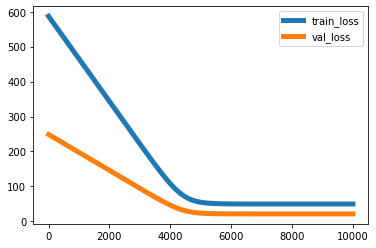

In [28]:
plt.plot(np.arange(1,len(slr.train_loss)+1),slr.train_loss,label='train_loss',linewidth=5)
plt.plot(np.arange(1,len(slr.val_loss)+1),slr.val_loss,label='val_loss',linewidth=5)
plt.legend()

In [29]:
slr.theta

array([-0.45521257,  0.29379749,  0.04673142,  0.72525243,  0.74075751])

## 【問題7】決定領域の可視化
決定領域を可視化してください。

In [30]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color)) # plt.contourf 等高線
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5) # plt.contour 等高線描写
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [32]:
print("iris.data")
print(iris.data.shape)
print("iris.target")
print(iris.target.shape)

iris.data
(150, 4)
iris.target
(150,)


In [33]:
X = iris.data[:100,:]
y = iris.target[:100]
X = X[:,[0,2]]            
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.5, random_state=0,)

In [34]:
print(iris.data[:100,:].shape)
print(iris.target[:100].shape)


(100, 4)
(100,)


In [35]:
slr = ScratchLogisticRegression(iter_num=10000, lr=0.0001,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

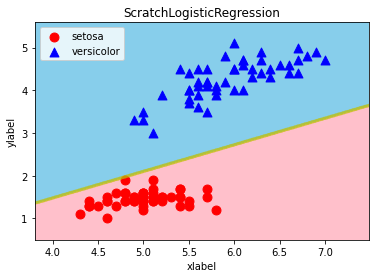

In [36]:
decision_region(X, y, slr, step=0.01, title='ScratchLogisticRegression', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor'])